<center><h1>Data Acquisition</h1></center>
<hr/>

#### Imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("data/ner.csv")

In [3]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


#### Statistics

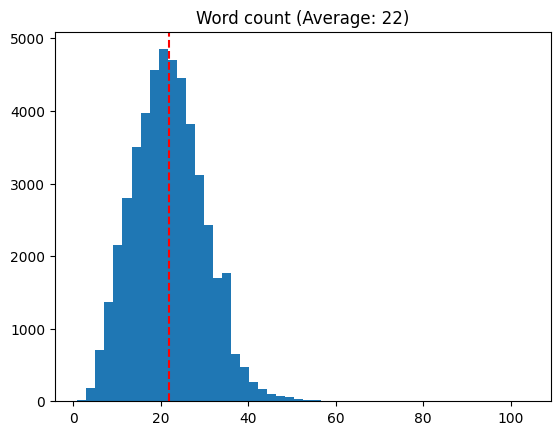

In [5]:
plt.figure()

y = df.Sentence.apply(lambda n: len(n.split()))
plt.hist(y, bins = 50)
plt.axvline(np.mean(y), color = 'red', linestyle = '--')

plt.title(f"Word count (Average: {round(np.mean(y))})")
plt.show()

In [6]:
df.Sentence[y < 5]

153              Amy Katz Narrates .
834             Paul Sisco reports .
1594                     John Garang
2491     IRAQ-POVERTY ( Washington )
2494              By AUSTIN ZALKIN .
                    ...             
43142                    He was 60 .
44027                 We 're sorry .
45848        Theyab escaped unhurt .
46498          Turkey opposes this .
46616          Jim Bertel narrates .
Name: Sentence, Length: 66, dtype: object

#### Process

In [7]:
y = df.Tag.apply(lambda n: json.loads(n.replace("'", '"')))

In [8]:
y

0        [O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...
1        [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
2        [O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo...
3            [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
4        [O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...
                               ...                        
47954    [B-gpe, O, O, O, O, O, O, B-gpe, O, O, O, O, O...
47955    [B-gpe, O, O, O, O, O, O, O, B-tim, O, O, O, O...
47956                    [O, O, O, O, O, O, O, O, O, O, O]
47957                    [O, O, O, O, O, O, O, O, O, O, O]
47958                         [B-gpe, O, O, O, O, O, O, O]
Name: Tag, Length: 47959, dtype: object

In [9]:
unique_tags = []
for tags in y:
    for tag in tags:
        if tag not in unique_tags:
            unique_tags.append(tag)

In [10]:
unique_tags

['O',
 'B-geo',
 'B-gpe',
 'B-per',
 'I-geo',
 'B-org',
 'I-org',
 'B-tim',
 'B-art',
 'I-art',
 'I-per',
 'I-gpe',
 'I-tim',
 'B-nat',
 'B-eve',
 'I-eve',
 'I-nat']

In [11]:
tags_dict = {unique_tag: 0 for unique_tag in unique_tags}

In [12]:
for tags in y:
    for tag in tags:
        tags_dict[tag] += 1

In [65]:
tags_dict

{'O': 887908,
 'B-geo': 37644,
 'B-gpe': 15870,
 'B-per': 16990,
 'I-geo': 7414,
 'B-org': 20143,
 'I-org': 16784,
 'B-tim': 20333,
 'B-art': 402,
 'I-art': 297,
 'I-per': 17251,
 'I-gpe': 198,
 'I-tim': 6528,
 'B-nat': 201,
 'B-eve': 308,
 'I-eve': 253,
 'I-nat': 51}

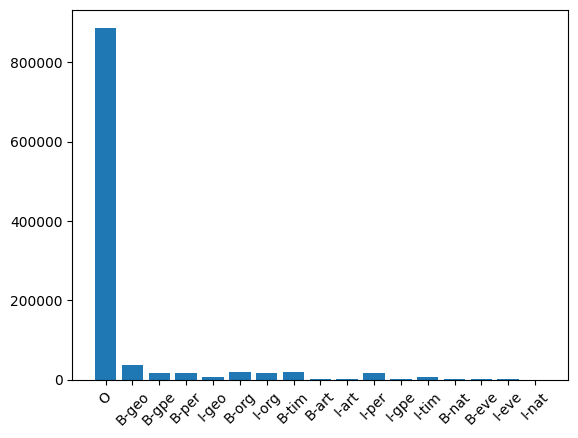

In [64]:
fig, ax = plt.subplots(1, 1)

ax.bar(range(len(tags_dict)), tags_dict.values())
ax.set_xticks(range(len(tags_dict)))
ax.set_xticklabels(list(tags_dict.keys()), rotation = 45)
plt.show()

Since we only need to extract characters from text, we will use B-per and I-per and all other will be O.

In [11]:
y = y.apply(lambda n: [tag if 'per' in tag else 'O' for tag in n])

In [12]:
y

0        [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
1        [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
2               [O, O, O, O, O, O, O, O, O, O, O, O, O, O]
3            [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
4        [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
                               ...                        
47954    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
47955    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
47956                    [O, O, O, O, O, O, O, O, O, O, O]
47957                    [O, O, O, O, O, O, O, O, O, O, O]
47958                             [O, O, O, O, O, O, O, O]
Name: Tag, Length: 47959, dtype: object

In [13]:
per_tags = sum([sum([tag != 'O' for tag in tags]) for tags in y])
print(f"We have {per_tags} tags representing characters.")

We have 34241 tags representing characters.


#### Save processed data

In [14]:
new_df = pd.DataFrame([[df.Sentence[i], y[i]] for i in range(len(df))], columns = ['Sentence', 'Tag'])

In [15]:
new_df

,Sentence,Tag
0,Thousands of demonstrators have marched throug...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,Families of soldiers killed in the conflict jo...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,They marched from the Houses of Parliament to ...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"Police put the number of marchers at 10,000 wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,The protest comes on the eve of the annual con...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
...,...,...
47954,Indian border security forces are accusing the...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
47955,Indian officials said no one was injured in Sa...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
47956,Two more landed in fields belonging to a nearb...,"[O, O, O, O, O, O, O, O, O, O, O]"
47957,They say not all of the rockets exploded upon ...,"[O, O, O, O, O, O, O, O, O, O, O]"


In [16]:
new_df.to_csv("data/processed_ner.csv")